In [2]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [3]:
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
f = open("train.txt",'r')

'''
    Les données sont enregistrés sur df avec deux colonnes 
    colonne 'label' => langage maternelle
    colonne 'doc' => phrases en anglais 
'''
label=[]
phrase=[]
lines = f.readlines()
for l in lines:
    label.append(l[:5])
    phrase.append(l[5:])
labelSet=set(label)
df = pd.DataFrame(list(zip(label, phrase)), columns =['label', 'doc']) 

In [124]:
def clean_phrase(text):
    """
    Clean the input text 
    """
    cleaned_text = text
    cleaned_text =  re.sub(r'^https?:\/\/.*[\r\n]*', '', cleaned_text)
    cleaned_text = re.sub('<.*>', '', cleaned_text)
    cleaned_text = re.sub('[^a-zA-Z0-9\s]', '', cleaned_text)
    
    return cleaned_text
df["doc"] = df["doc"].apply(lambda x: clean_phrase(x))

In [116]:
df["doc"]

0        IThe importance and popularity of travelling ...
1        It is an important decision  how to plan your...
2        Some people believe that young people can enj...
3        Travelling is usually considered as good recr...
4        i agree that  Life is a person live period of...
                              ...                        
9895     Nowadays  more and more people go abroad  no ...
9896     In accomplishing something that is risky come...
9897     At the beginning of the 21st century  the inc...
9898     The number of cars in use across the world ha...
9899     Many people think it is betters to have borad...
Name: doc, Length: 9900, dtype: object

In [11]:
Y=df["label"].tolist()
le = LabelEncoder()
le.fit(df.label.unique())
langue = le.classes_
y=le.fit_transform(Y)

langue_encoder = [(langue[i],i) for i in range(len(langue))]
print(langue_encoder)


[('(ARA)', 0), ('(CHI)', 1), ('(FRE)', 2), ('(GER)', 3), ('(HIN)', 4), ('(ITA)', 5), ('(JPN)', 6), ('(KOR)', 7), ('(SPA)', 8), ('(TEL)', 9), ('(TUR)', 10)]


In [12]:

def nlp_tfidf_classification(X,y_encoded):
    tfidf_vectorizer = TfidfVectorizer(max_features=10000)
    X_tfidf = tfidf_vectorizer.fit_transform(X)
    X_tfidf = X_tfidf.toarray()

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_tfidf.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(11, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
    
    y_pred = model.predict(X_test).argmax(axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {accuracy:.4f}")

    return model,y_pred,y_test



In [13]:
model,y_pred,y_test = nlp_tfidf_classification(df["doc"],y)

Epoch 1/10
223/223 [==============================] - 3s 10ms/step - loss: 2.2892 - accuracy: 0.1853 - val_loss: 1.9330 - val_accuracy: 0.4078
Epoch 2/10
223/223 [==============================] - 2s 11ms/step - loss: 1.6644 - accuracy: 0.4003 - val_loss: 1.3608 - val_accuracy: 0.5833
Epoch 3/10
223/223 [==============================] - 2s 9ms/step - loss: 1.1854 - accuracy: 0.5797 - val_loss: 1.0679 - val_accuracy: 0.6692
Epoch 4/10
223/223 [==============================] - 2s 9ms/step - loss: 0.8423 - accuracy: 0.7204 - val_loss: 0.9333 - val_accuracy: 0.6957
Epoch 5/10
223/223 [==============================] - 2s 9ms/step - loss: 0.6011 - accuracy: 0.8088 - val_loss: 0.8625 - val_accuracy: 0.7071
Epoch 6/10
223/223 [==============================] - 2s 9ms/step - loss: 0.4491 - accuracy: 0.8621 - val_loss: 0.8319 - val_accuracy: 0.7134
Epoch 7/10
223/223 [==============================] - 2s 9ms/step - loss: 0.3463 - accuracy: 0.9007 - val_loss: 0.8449 - val_accuracy: 0.7096
Epoc

<AxesSubplot: >

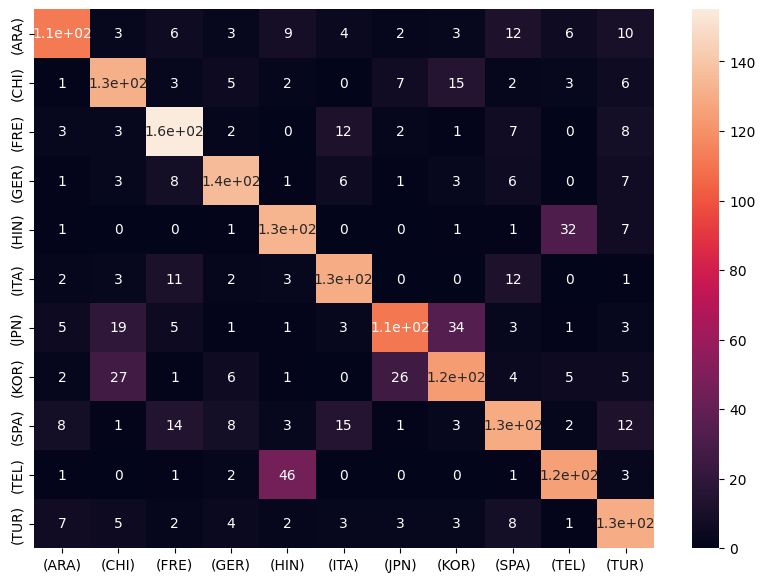

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
C2 = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(C2, index=list(langue), columns=list(langue))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

TEL9 et HIN4 est tres facile de mélanger, on faire une modele pour classifier que HIN et TEL

In [20]:
df.filter('(TEL)', axis=0)

,label,doc
